<a href="https://colab.research.google.com/github/NGUYEN-CONG-VINH/FINAL_PROJECT/blob/main/lua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Nguyễn Công Vinh 20146183
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [ ]:
n=150
folder='/content/drive/MyDrive/lua/lua_train/'
photos,labels=list(),list()
for file in listdir(folder):
  if file.startswith('1'):
    output=0.0
  if file.startswith('2'):
    output=1.0
  if file.startswith('3'):
    output=2.0
  photo=load_img(folder+file,target_size=(n,n))
  photo=img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos_train=asarray(photos)
labels_train=asarray(labels)

In [ ]:
n=150
folder='/content/drive/MyDrive/lua/lua_test/'
photos,labels=list(),list()
for file in listdir(folder):
  if file.startswith('1'):
    output=0.0
  if file.startswith('2'):
    output=1.0
  if file.startswith('3'):
    output=2.0
  photo=load_img(folder+file,target_size=(n,n))
  photo=img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos_test=asarray(photos)
labels_test=asarray(labels)

In [ ]:
print(photos_train.shape)
print(labels_train.shape)
print(photos_test.shape)
print(labels_test.shape)

(631, 150, 150, 3)
(631,)
(171, 150, 150, 3)
(171,)


In [ ]:
save('/content/drive/MyDrive/lua_train_photo.npy',photos_train)
save('/content/drive/MyDrive/lua_train_label.npy',labels_train)
save('/content/drive/MyDrive/lua_test_photo.npy',photos_test)
save('/content/drive/MyDrive/lua_test_label.npy',labels_test)

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
train_x=np.array(photos_train)
train_y=np.array(labels_train)
test_x=np.array(photos_test)
test_y=np.array(labels_test)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(631, 150, 150, 3)
(631,)
(171, 150, 150, 3)
(171,)


Text(0.5, 1.0, 'so:2.0')

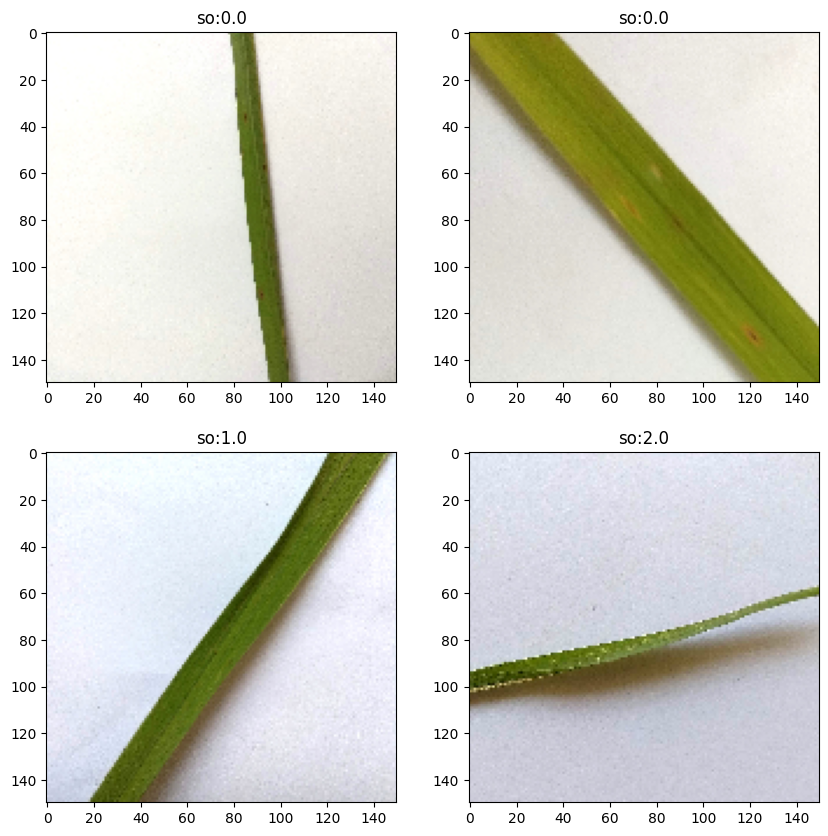

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])
plt.subplot(221)
plt.imshow(train_x[0].astype('uint8'),cmap='gray')
plt.title('so:{}'.format(train_y[0]))
plt.subplot(222)
plt.imshow(train_x[100].astype('uint8'),cmap='gray')
plt.title('so:{}'.format(train_y[100]))
plt.subplot(223)
plt.imshow(train_x[400].astype('uint8'),cmap='gray')
plt.title('so:{}'.format(train_y[400]))
plt.subplot(224)
plt.imshow(train_x[500].astype('uint8'),cmap='gray')
plt.title('so:{}'.format(train_y[500]))

In [ ]:
train_x=train_x.reshape((631,n,n,3))
train_x=train_x.astype('float32')/255
test_x=test_x.reshape((171,n,n,3))
test_x=test_x.astype('float32')/255
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(631, 150, 150, 3)
(171, 150, 150, 3)
(631,)
(171,)


In [ ]:
from keras.utils import to_categorical# chuyển qua one host encording
train_y=to_categorical(train_y)
test_y=to_categorical(test_y)
print(train_y.shape)
print(test_y.shape)

(631, 3)
(171, 3)


In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam #toc do hoc 0.01
batch_size=45
epochs=130
classes=3

In [ ]:
from keras.layers.attention.multi_head_attention import activation
from keras.layers import LeakyReLU
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(n,n,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=(3,3),activation='linear',input_shape=(n,n,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128,kernel_size=(3,3),activation='linear',input_shape=(n,n,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

In [ ]:
#đưa về ANN
model.add(Flatten()) #chuyển thành vecto
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(Dense(classes,activation='softmax'))

In [ ]:
from tensorflow.python import summary
from keras.losses import categorical_crossentropy
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_44 (LeakyReLU)  (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 dropout_44 (Dropout)        (None, 75, 75, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_45 (LeakyReLU)  (None, 75, 75, 64)        0         
                                                     

In [ ]:
train = model.fit(train_x,train_y,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/130
15/15 [==============================] - 4s 58ms/step - loss: 3.4431 - accuracy: 0.4231
Epoch 2/130
15/15 [==============================] - 1s 58ms/step - loss: 1.0547 - accuracy: 0.4279
Epoch 3/130
15/15 [==============================] - 1s 58ms/step - loss: 0.8831 - accuracy: 0.5943
Epoch 4/130
15/15 [==============================] - 1s 58ms/step - loss: 1.1630 - accuracy: 0.4739
Epoch 5/130
15/15 [==============================] - 1s 59ms/step - loss: 0.8511 - accuracy: 0.6086
Epoch 6/130
15/15 [==============================] - 1s 69ms/step - loss: 0.8111 - accuracy: 0.6418
Epoch 7/130
15/15 [==============================] - 1s 69ms/step - loss: 0.7491 - accuracy: 0.6403
Epoch 8/130
15/15 [==============================] - 1s 64ms/step - loss: 0.6475 - accuracy: 0.7274
Epoch 9/130
15/15 [==============================] - 1s 58ms/step - loss: 0.6586 - accuracy: 0.7116
Epoch 10/130
15/15 [==============================] - 1s 58ms/step - loss: 0.8405 - accuracy: 0.5864

In [ ]:
model.save('/content/drive/MyDrive/model_lua.h5')

Test loss 0.0044886344112455845
Test accuracy 0.9984152317047119


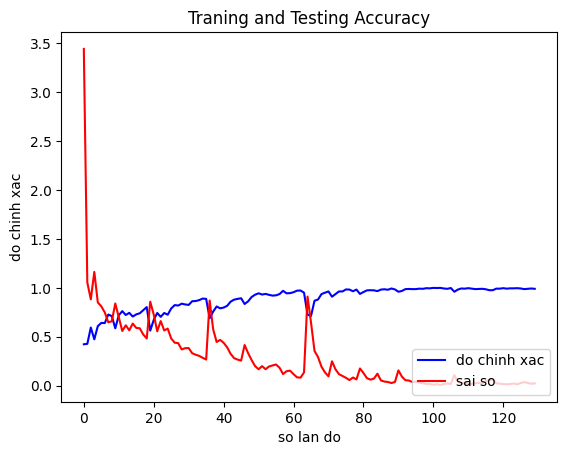

In [ ]:
eval=model.evaluate(train_x,train_y,verbose=0)
print('Test loss',eval[0])
print('Test accuracy',eval[1])
accuracy=train.history['accuracy']
val_accuracy=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'b')
plt.plot(epochs,val_accuracy,'r')
plt.title('Traning and Testing Accuracy')
plt.ylabel('do chinh xac')
plt.xlabel('so lan do')
plt.legend(['do chinh xac','sai so'], loc = 'lower right')

Test loss 1.7619187831878662
Test accuracy 0.719298243522644


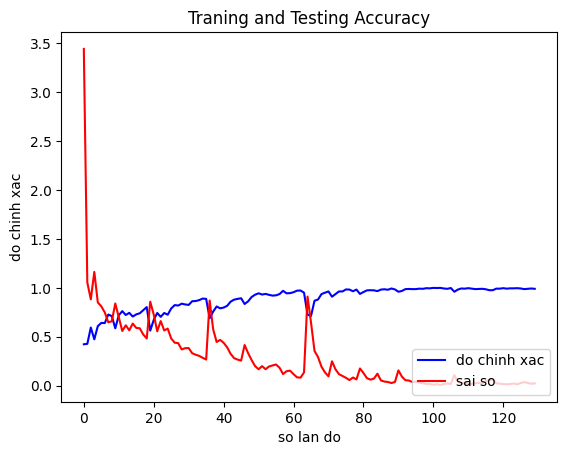

In [ ]:
eval=model.evaluate(test_x,test_y,verbose=0)
print('Test loss',eval[0])
print('Test accuracy',eval[1])
accuracy=train.history['accuracy']
val_accuracy=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'b')
plt.plot(epochs,val_accuracy,'r')
plt.title('Traning and Testing Accuracy')
plt.ylabel('do chinh xac')
plt.xlabel('so lan do')
plt.legend(['do chinh xac','sai so'], loc = 'lower right')

1/1 [==============================] - 0s 17ms/step


Text(0.5, 1.0, 'Predict/Exactly: lua khoe/lua khoe')

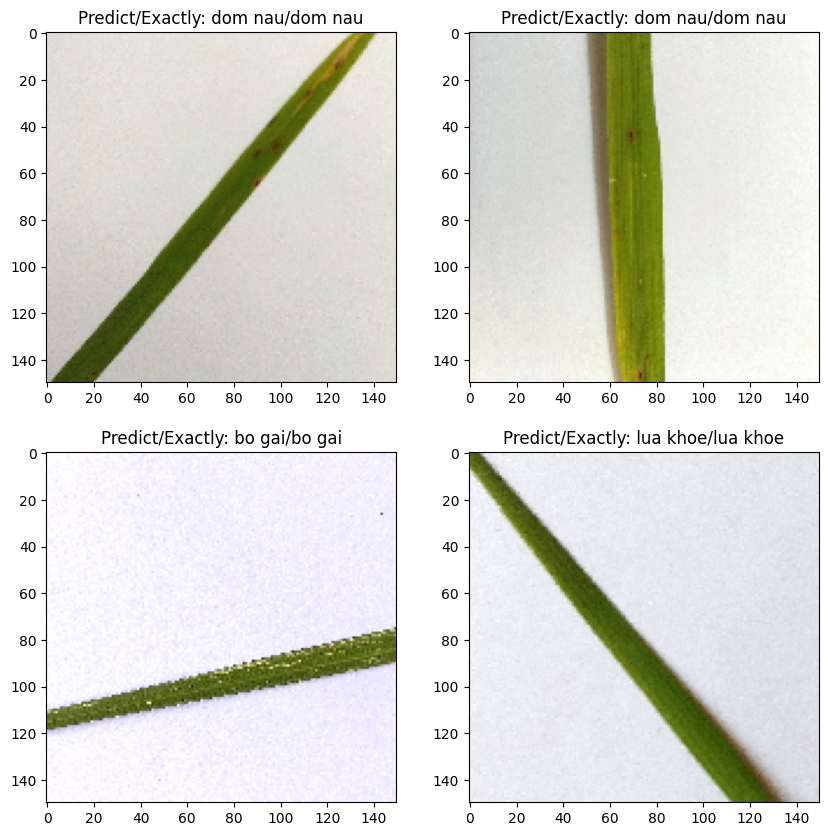

In [ ]:
name = ['dom nau','lua khoe','bo gai']

from keras.models import load_model
model=load_model('/content/drive/MyDrive/model_lua.h5')

import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
plt.figure(figsize=[10,10])
plt.subplot(221)
plt.imshow(test_x[20])
pred = model.predict(test_x[20].reshape((1,n,n,3)))
plt.title('Predict/Exactly: {}/{}'.format(name[pred.argmax()], name[test_y[10].argmax()] ))

plt.subplot(222)
plt.imshow(test_x[50])
pred = model.predict(test_x[50].reshape((1,n,n,3)))
plt.title('Predict/Exactly: {}/{}'.format(name[pred.argmax()], name[test_y[50].argmax()] ))

plt.subplot(223)
plt.imshow(test_x[80])
pred = model.predict(test_x[80].reshape((1,n,n,3)))
plt.title('Predict/Exactly: {}/{}'.format(name[pred.argmax()], name[test_y[80].argmax()] ))

plt.subplot(224)
plt.imshow(test_x[150])
pred = model.predict(test_x[150].reshape((1,n,n,3)))
plt.title('Predict/Exactly: {}/{}'.format(name[pred.argmax()], name[test_y[150].argmax()] ))